## PROJECT PENGOLAHAN CITRA DIGITAL
## Ekstraksi Fitur Warna Pada Plat Kendaraan Menggunakan Metode Segmentasi Objek

### KELOMPOK 24
- F1D021019	USWATUL ULYA
- F1D021137	SHELBILA FISABIL ARUM
- F1D021061	NAZMI WARDIANI
- F1D020091	RIZWAN ALFIAN
- F1D021132	RAMADHANI AL-QADRI

In [27]:
import os
import os.path 
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils as im

- `os` dan `os.path` digunakan untuk berinteraksi dengan sistem operasi, seperti mengakses direktori dan memeriksa keberadaan file.
- `pandas as pd` adalah pustaka untuk analisis data yang memungkinkan manipulasi dan analisis data dengan mudah menggunakan struktur data seperti DataFrames.
- `numpy as np` adalah pustaka untuk komputasi numerik yang menyediakan struktur data dan fungsi matematika yang kuat.
- `cv2 as cv` adalah pustaka OpenCV (Open Source Computer Vision) yang digunakan untuk pengolahan gambar dan komputer visi.
- `imutils as im` adalah pustaka utilitas yang menyediakan berbagai fungsi bantu untuk pengolahan gambar dengan menggunakan OpenCV. Modul ini menyederhanakan beberapa tugas umum dalam pengolahan gambar seperti penskalaan, rotasi, pemangkasan, dan transformasi lainnya.
- `matplotlib.pyplot as plt` digunakan untuk membuat plot dan visualisasi data.

Dengan mengimpor library di atas maka dapat diakses fungsi-fungsi dan fitur-fitur yang diperlukan untuk pengolahan gambar, analisis data, manipulasi file dan direktori, serta visualisasi data.

In [28]:
def ImportImage(folder):
    images = []
    filenames = []
    datalabel = []
    for label in os.listdir(folder):
        
        for filename in os.listdir(folder+label):
            img = cv.imread(os.path.join(folder+label, filename))
            rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            # hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)
            filenames.append(filename)
            datalabel.append(label)
            if img is not None:
                images.append(rgb)
    return images, filenames, datalabel

images, filenames, label = ImportImage("Data Set/")

Code tersebut adalah sebuah fungsi yang digunakan untuk mengimpor gambar-gambar dari folder yang ditentukan. Fungsi tersebut mengembalikan tiga array: `images` yang berisi gambar-gambar yang diimpor dalam format RGB, `filenames` yang berisi nama file dari setiap gambar, dan `datalabel` yang berisi label dari setiap gambar.

Secara keseluruhan, fungsi ini melakukan hal berikut:

1. Membuat array kosong `images`, `filenames`, dan `datalabel` untuk menyimpan data gambar.

2. Melakukan iterasi melalui setiap subfolder (label) dalam folder yang ditentukan.

3. Dalam setiap subfolder, melakukan iterasi melalui setiap file gambar.

4. Membaca gambar menggunakan `cv.imread()` dan mengonversinya menjadi format RGB.

5. Menyimpan nama file dan label gambar ke dalam array `filenames` dan `datalabel`.

6. Jika gambar berhasil dibaca, menambahkan gambar dalam format RGB ke dalam array `images`.

7. Setelah selesai mengiterasi melalui semua subfolder dan file gambar, fungsi mengembalikan array `images`, `filenames`, dan `datalabel`.

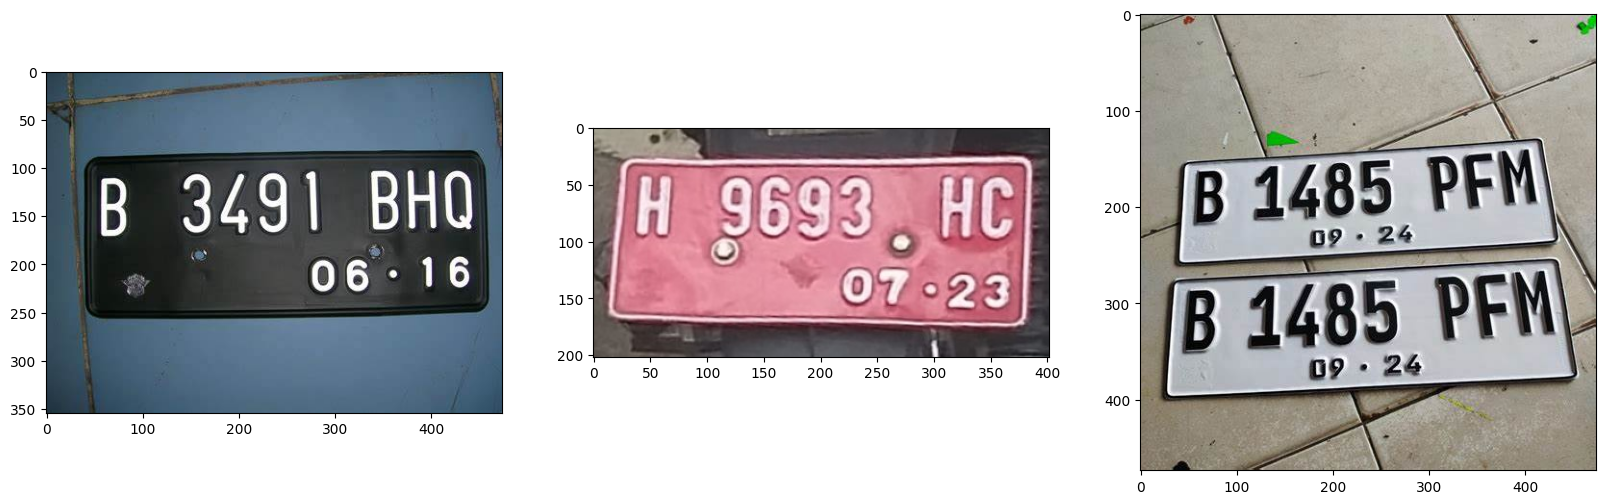

In [29]:
def tampilFoto(img):
    plt.figure(figsize=(20,20))
    for i in range(len(img)):
        plt.subplot(1,len(img),i+1)
        plt.imshow(img[i], cmap='gray')
tampilFoto([images[9], images[176], images[200]])

Code di atas adalah sebuah fungsi yang digunakan untuk menampilkan beberapa gambar dalam satu baris menggunakan library matplotlib. Fungsi ini mengambil satu parameter, yaitu `img`, yang berisi array gambar yang ingin ditampilkan.

Berikut adalah penjelasan keseluruhan dari code tersebut:

1. Fungsi `tampilFoto(img)` didefinisikan dengan satu parameter `img`, yang merupakan array gambar yang ingin ditampilkan.

2. Pada baris pertama dalam fungsi, `plt.figure(figsize=(20,20))` digunakan untuk membuat gambar dengan ukuran 20x20 inci sebagai tempat untuk menampilkan gambar-gambar.

3. Loop `for i in range(len(img))` digunakan untuk mengiterasi melalui setiap elemen dalam array `img`.

4. Di setiap iterasi loop, `plt.subplot(1,len(img),i+1)` digunakan untuk membuat subplot dengan 1 baris dan jumlah kolom sesuai dengan panjang `img`. Nilai `i+1` digunakan untuk menentukan posisi subplot yang sesuai.

5. Selanjutnya, `plt.imshow(img[i], cmap='gray')` digunakan untuk menampilkan gambar ke-i dari array `img` menggunakan colormap 'gray'. Anda dapat mengubah colormap sesuai kebutuhan Anda.

6. Setelah selesai mengiterasi melalui semua gambar, fungsi ini akan menampilkan gambar-gambar tersebut dalam satu baris sesuai dengan urutan dalam array `img`.

In [30]:
resizes = []
for image in images:
    result = im.resize(image, height=200, width=512,inter=cv.INTER_AREA)
    resizes.append(result)

Berdasarkan code di atas, terdapat loop `for` yang digunakan untuk mengiterasi melalui setiap gambar dalam array `images`. Pada setiap iterasi, gambar tersebut diubah ukurannya menggunakan fungsi `im.resize()`.

Berikut adalah penjelasan secara keseluruhan mengenai kode tersebut:

1. Membuat array kosong `resizes` yang akan digunakan untuk menyimpan gambar-gambar yang telah diubah ukurannya.

2. Menggunakan loop `for` untuk mengiterasi melalui setiap gambar dalam array `images`.

3. Pada setiap iterasi, menggunakan fungsi `im.resize()` untuk mengubah ukuran gambar. Parameter pertama yang diberikan adalah gambar yang ingin diubah ukurannya (`image`).

4. Ukuran yang diinginkan untuk gambar baru ditentukan menggunakan parameter `height` dan `width` dengan nilai 200 dan 512 secara berturut-turut.

5. Opsi `inter` digunakan untuk menentukan metode interpolasi yang digunakan saat mengubah ukuran gambar. Dalam kode tersebut, digunakan `cv.INTER_AREA` yang merupakan metode interpolasi area.

6. Gambar hasil yang telah diubah ukurannya kemudian ditambahkan ke dalam array `resizes` menggunakan metode `append()`.

7. Setelah selesai mengiterasi melalui semua gambar dalam array `images`, array `resizes` akan berisi gambar-gambar yang telah diubah ukurannya sesuai dengan parameter yang diberikan.

In [31]:
normalize = []
for image in resizes:
    image = cv.normalize(image, None, alpha=0,beta=200, norm_type=cv.NORM_MINMAX) 
    normalize.append(image)

Berdasarkan code di atas, ada loop `for` yang digunakan untuk mengiterasi melalui setiap gambar dalam array `resizes`. Pada setiap iterasi, gambar tersebut dinormalisasi menggunakan fungsi `cv.normalize()`.

Berikut ini adalah penjelasan keseluruhan tentang kode tersebut:

1. Membuat array kosong `normalize` yang akan digunakan untuk menyimpan gambar-gambar yang telah dinormalisasi.

2. Menggunakan loop `for` untuk mengiterasi melalui setiap gambar dalam array `resizes`.

3. Pada setiap iterasi, gambar yang ingin dinormalisasi disimpan dalam variabel `image`.

4. Menggunakan fungsi `cv.normalize()` untuk melakukan normalisasi pada gambar. Parameter pertama adalah gambar yang ingin dinormalisasi (`image`).

5. Parameter `None` menunjukkan bahwa tidak ada mask yang digunakan dalam normalisasi.

6. Parameter `alpha` dan `beta` mengontrol rentang nilai hasil normalisasi. Dalam kasus ini, nilai `alpha` diatur menjadi 0 dan nilai `beta` diatur menjadi 200.

7. Parameter `norm_type` menentukan tipe normalisasi yang digunakan. Dalam kode tersebut, digunakan `cv.NORM_MINMAX` yang melakukan normalisasi dengan mengubah rentang nilai menjadi 0 hingga 200.

8. Gambar hasil normalisasi kemudian ditambahkan ke dalam array `normalize` menggunakan metode `append()`.

9. Setelah selesai mengiterasi melalui semua gambar dalam array `resizes`, array `normalize` akan berisi gambar-gambar yang telah dinormalisasi sesuai dengan parameter yang diberikan.

Dengan menggunakan kode tersebut, Anda dapat menghasilkan array `normalize` yang berisi gambar-gambar yang telah diubah ukuran dan dinormalisasi sesuai dengan parameter yang ditentukan.

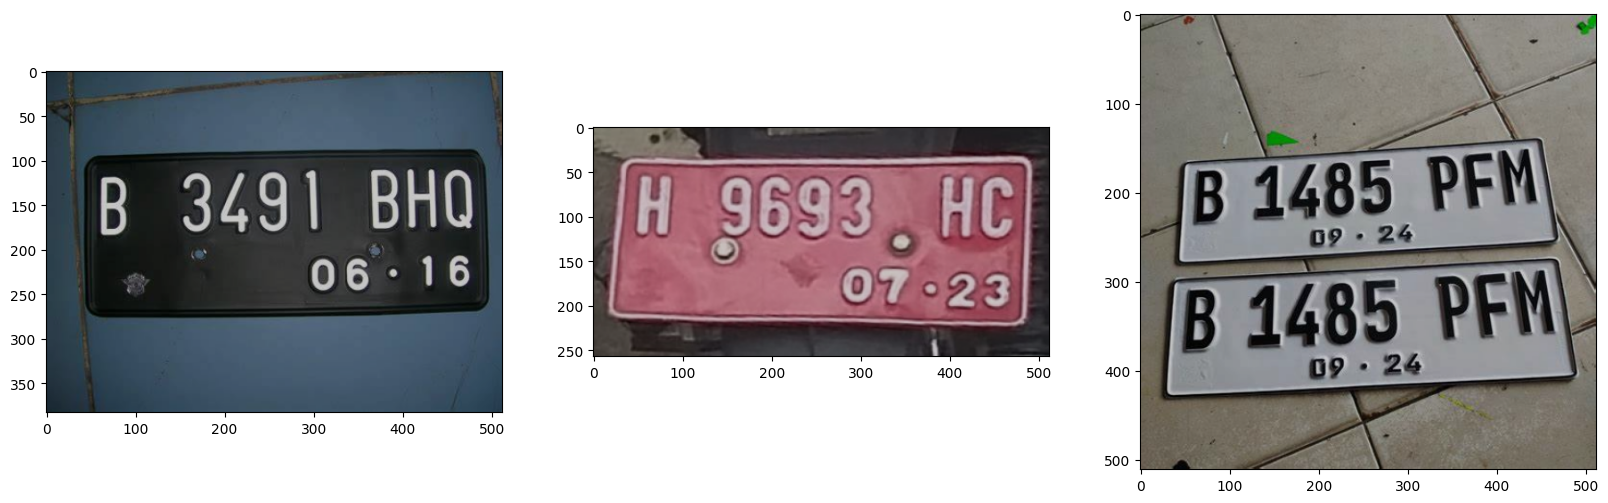

In [32]:
tampilFoto([normalize[9],normalize[176],normalize[200]])

Fungsi `tampilFoto()` yang ada di atas dengan argumen `[normalize[0], normalize[160], normalize[299]]` akan menampilkan tiga gambar dari array `normalize`. 

Berikut adalah penjelasan singkat tentang kode tersebut:

1. Fungsi `tampilFoto()` digunakan untuk menampilkan gambar-gambar yang diberikan sebagai argumen.
2. Memanggil fungsi `tampilFoto()` dengan argumen `[normalize[0], normalize[160], normalize[299]]`.
3. Mnampilkan gambar pertama, gambar ke-160, dan gambar terakhir dari array `normalize`.
4. Di dalam fungsi `tampilFoto()`, dilakukan pengaturan plot untuk menampilkan beberapa gambar secara sejajar.
5. Pada setiap iterasi loop, gambar dalam array `normalize` ditampilkan menggunakan `plt.imshow()`.
6. Parameter `cmap='gray'` digunakan untuk menampilkan gambar dalam skala abu-abu.
7. Setelah semua gambar ditampilkan, tampilan plot akhirnya ditampilkan menggunakan `plt.show()`.

Dengan menjalankan kode tersebut, Anda akan melihat tiga gambar yang telah diubah ukuran dan dinormalisasi dari array `normalize`. Gambar-gambar tersebut akan ditampilkan secara sejajar dalam satu jendela tampilan.

In [33]:
def segmentationRed(image):
    hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)
    mask = cv.inRange(hsv, (136, 87, 111), (180, 255, 255))
    result = cv.bitwise_and(image, image, mask=mask)

    return result

def segmentationWhite(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    lower_white = np.array([0, 0, 200], dtype=np.uint8)
    upper_white = np.array([180, 25, 255], dtype=np.uint8)
    mask = cv.inRange(hsv, lower_white, upper_white)
    result = cv.bitwise_and(image, image, mask=mask)
    
    return result
def segmentationBlack(image):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    _, threshold = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV)
    result = cv.bitwise_and(image, image, mask=threshold)

    return result
def segmentation(image):
    return segmentationWhite(image)+segmentationRed(image)+segmentationBlack(image)

Fungsi-fungsi di atas adalah beberapa fungsi yang terkait dengan segmentasi dan analisis warna pada gambar. Berikut adalah penjelasan singkat tentang masing-masing fungsi:

1. `segmentationRed(image)`: Fungsi ini melakukan segmentasi gambar berdasarkan rentang warna merah dalam mode warna HSV. Gambar masukan diubah ke format HSV menggunakan `cv.cvtColor()`. Kemudian, dilakukan operasi thresholding pada saluran Hue, Saturation, dan Value untuk mendapatkan mask yang mencakup warna merah yang diinginkan. Akhirnya, operasi `cv.bitwise_and()` digunakan untuk menerapkan mask ke gambar asli.

2. `segmentationWhite(image)`: Fungsi ini melakukan segmentasi gambar berdasarkan rentang warna putih dalam mode warna HSV. Gambar masukan diubah ke format HSV menggunakan `cv.cvtColor()`. Rentang warna putih ditentukan menggunakan nilai ambang batas dalam saluran Hue, Saturation, dan Value. Operasi thresholding dilakukan dengan `cv.inRange()` untuk mendapatkan mask yang mencakup warna putih yang diinginkan. Mask tersebut kemudian diterapkan pada gambar asli menggunakan `cv.bitwise_and()`.

3. `segmentationBlack(image)`: Fungsi ini melakukan segmentasi gambar berdasarkan warna hitam. Gambar masukan diubah ke skala abu-abu menggunakan `cv.cvtColor()`. Dilakukan operasi thresholding dengan `cv.threshold()` untuk menghasilkan gambar biner dengan piksel hitam dan putih. Mask tersebut kemudian diterapkan pada gambar asli menggunakan `cv.bitwise_and()`.

4. `segmentation(image)`: Fungsi ini menggabungkan segmentasi dari tiga fungsi sebelumnya (`segmentationRed()`, `segmentationWhite()`, dan `segmentationBlack()`) dengan cara menjumlahkan hasil segmentasi mereka. Ini berguna untuk mendapatkan hasil segmentasi yang menggabungkan area berwarna merah, putih, dan hitam dalam gambar.

Fungsi-fungsi di atas dapat digunakan bersama-sama untuk melakukan segmentasi warna pada gambar dan menganalisis statistik warna dari gambar tersebut.

In [34]:
segments=[]
for image in images:
    segments.append(segmentation(image))

Berdasarkan code di atas, terdapat loop `for` yang digunakan untuk mengiterasi melalui setiap gambar dalam array `images`. Pada setiap iterasi, dilakukan segmentasi pada gambar tersebut menggunakan fungsi `segmentation()` dan hasilnya ditambahkan ke dalam array `segments`.

Berikut adalah penjelasan singkat mengenai kode tersebut:

1. Membuat array kosong `segments` yang akan digunakan untuk menyimpan hasil segmentasi dari setiap gambar.

2. Menggunakan loop `for` untuk mengiterasi melalui setiap gambar dalam array `images`.

3. Pada setiap iterasi, gambar tersebut disimpan dalam variabel `image`.

4. Memanggil fungsi `segmentation()` dengan argumen `image` untuk melakukan segmentasi pada gambar.

5. Hasil segmentasi dari gambar tersebut ditambahkan ke dalam array `segments` menggunakan metode `append()`.

6. Setelah selesai mengiterasi melalui semua gambar dalam array `images`, array `segments` akan berisi hasil segmentasi dari setiap gambar.

Dengan menggunakan kode tersebut, Anda dapat melakukan segmentasi pada setiap gambar dalam array `images` dan mendapatkan hasil segmentasi yang disimpan dalam array `segments`.

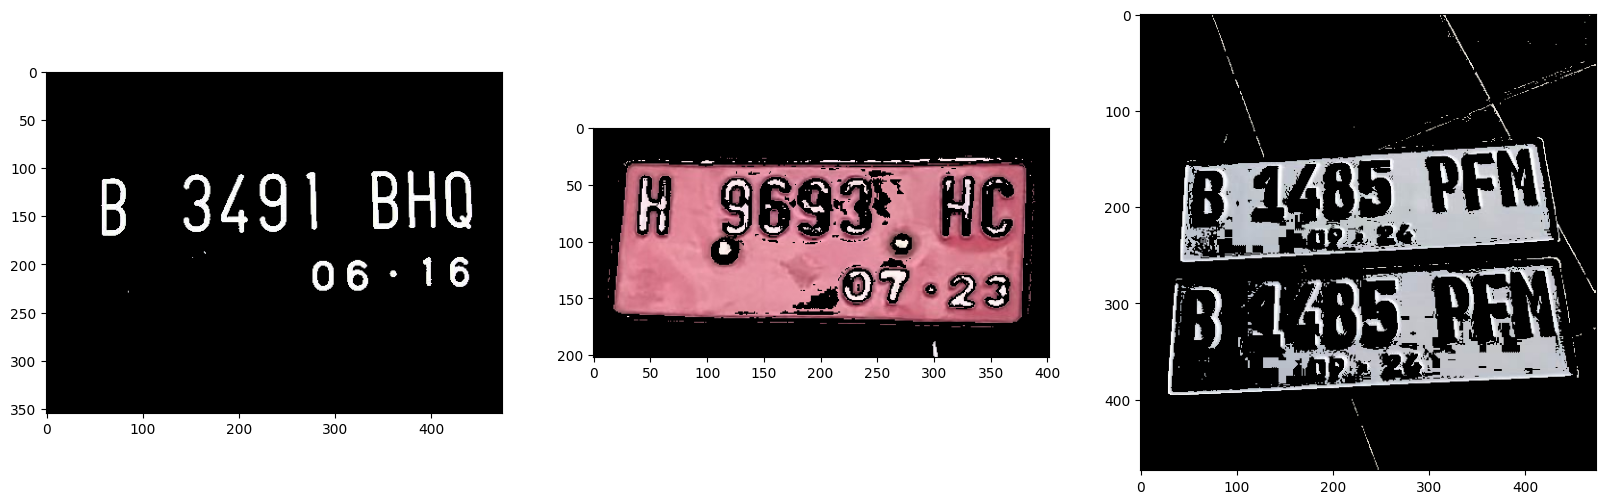

In [35]:
tampilFoto([segments[9],segments[176],segments[200]])

Fungsi `tampilFoto()` pada code di atas dengan argumen `[segments[0], segments[160], segments[299]]` akan menampilkan tiga gambar hasil segmentasi dari array `segments`.

Berikut adalah penjelasan singkat tentang kode tersebut:

1. Fungsi `tampilFoto()` digunakan untuk menampilkan gambar-gambar yang diberikan sebagai argumen.

2. Anda memanggil fungsi `tampilFoto()` dengan argumen `[segments[0], segments[160], segments[299]]`.

3. Ini berarti Anda ingin menampilkan gambar hasil segmentasi dari indeks ke-0, indeks ke-160, dan indeks ke-299 dalam array `segments`.

4. Di dalam fungsi `tampilFoto()`, dilakukan pengaturan plot untuk menampilkan beberapa gambar secara sejajar.

5. Pada setiap iterasi loop, gambar dalam array `segments` ditampilkan menggunakan `plt.imshow()`.

6. Parameter `cmap='gray'` digunakan untuk menampilkan gambar dalam skala abu-abu.

7. Setelah semua gambar ditampilkan, tampilan plot akhirnya ditampilkan menggunakan `plt.show()`.

Dengan menjalankan kode tersebut, Anda akan melihat tiga gambar hasil segmentasi yang telah diproses dari array `segments`. Gambar-gambar tersebut akan ditampilkan secara sejajar dalam satu jendela tampilan.

In [36]:
def eros(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    gradient_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
    gradient_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
    
    result = np.sqrt(gradient_x**2 + gradient_y**2)
    
    return result

Fungsi `eros()` yaitu mengimplementasikan operasi erosi pada gambar yang diberikan sebagai argumen. Berikut adalah penjelasan singkat mengenai kode tersebut:

1. Fungsi `eros()` mengambil gambar sebagai argumen, yang akan diberi nama `image`.

2. Dalam fungsi tersebut, gambar dikonversi menjadi citra skala keabuan menggunakan fungsi `cv.cvtColor()` dengan parameter `cv.COLOR_BGR2GRAY`.

3. Selanjutnya, gradient horizontal (`gradient_x`) dan gradient vertikal (`gradient_y`) dihitung menggunakan operasi Sobel pada citra skala keabuan. Fungsi `cv.Sobel()` digunakan untuk menghitung gradien dengan parameter seperti ksize=3 yang menentukan ukuran kernel Sobel.

4. Gradien x dan gradien y digunakan untuk menghitung magnitudo gradien menggunakan rumus Euclidean distance sqrt(gradient_x^2 + gradient_y^2).

5. Hasil magnitudo gradien disimpan dalam variabel `result`.

6. Gambar hasil erosi yang telah dihitung kemudian dikembalikan sebagai output dari fungsi menggunakan pernyataan `return`.

Dengan menggunakan fungsi `eros()`, Anda dapat menerapkan operasi erosi pada gambar dan memperoleh gambar hasil erosi yang merupakan magnitudo gradien dari gambar asli.

In [37]:
eroded = []
for erosi in segments:
    erosi = eros(erosi)
    eroded.append(erosi)

berdasarkan code di atas, terdapat loop `for` yang digunakan untuk mengiterasi melalui setiap gambar dalam array `segments`. Pada setiap iterasi, dilakukan operasi erosi pada gambar tersebut menggunakan fungsi `eros()`, dan hasilnya ditambahkan ke dalam array `eroded`.

Berikut adalah penjelasan singkat mengenai kode tersebut:

1. Membuat array kosong `eroded` yang akan digunakan untuk menyimpan gambar-gambar hasil operasi erosi.

2. Menggunakan loop `for` untuk mengiterasi melalui setiap gambar dalam array `segments`.

3. Pada setiap iterasi, gambar tersebut disimpan dalam variabel `erosi`.

4. Memanggil fungsi `eros()` dengan argumen `erosi` untuk menerapkan operasi erosi pada gambar.

5. Hasil gambar yang telah dioperasikan erosi disimpan dalam variabel `erosi`.

6. Gambar hasil erosi kemudian ditambahkan ke dalam array `eroded` menggunakan metode `append()`.

7. Setelah selesai mengiterasi melalui semua gambar dalam array `segments`, array `eroded` akan berisi gambar-gambar yang telah dioperasikan erosi.

Dengan menggunakan kode tersebut, Anda dapat melakukan operasi erosi pada setiap gambar dalam array `segments` dan mendapatkan gambar-gambar hasil erosi yang disimpan dalam array `eroded`.

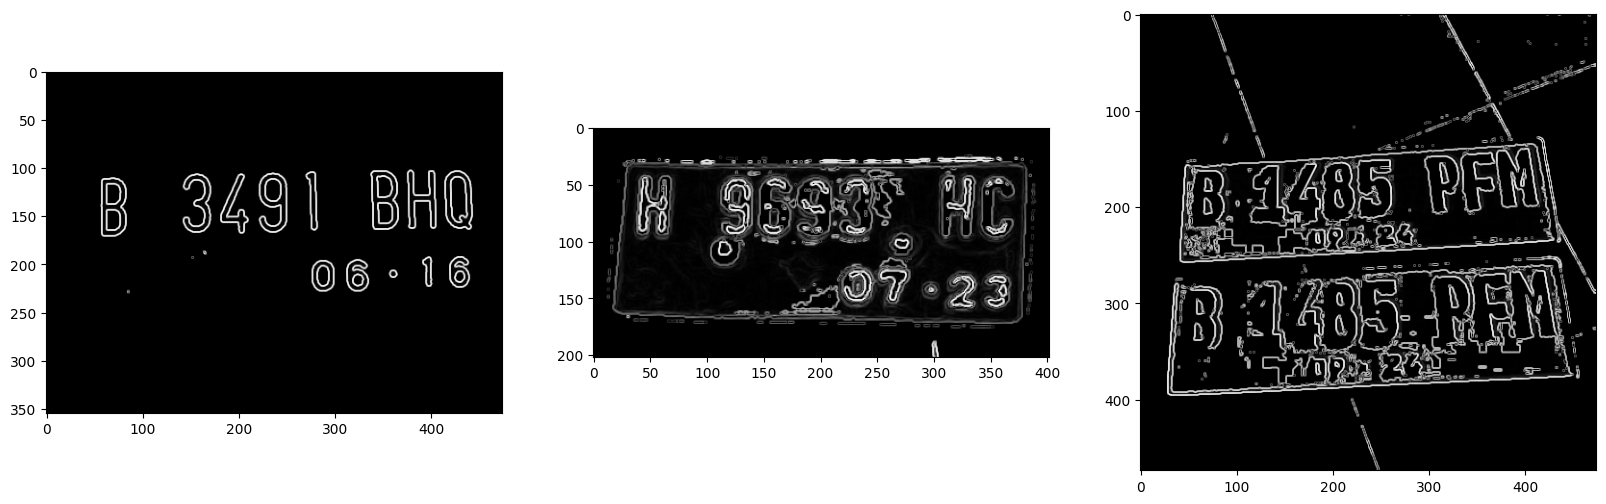

In [38]:
tampilFoto([eroded[9],eroded[176],eroded[200]])

Fungsi `tampilFoto()` pada code di atas dengan argumen `[eroded[0], eroded[160], eroded[299]]` akan menampilkan tiga gambar hasil erosi dari array `eroded`.

Berikut adalah penjelasan singkat tentang kode tersebut:

1. Fungsi `tampilFoto()` digunakan untuk menampilkan gambar-gambar yang diberikan sebagai argumen.

2. Anda memanggil fungsi `tampilFoto()` dengan argumen `[eroded[0], eroded[160], eroded[299]]`.

3. Ini berarti Anda ingin menampilkan gambar hasil erosi dari indeks ke-0, indeks ke-160, dan indeks ke-299 dalam array `eroded`.

4. Di dalam fungsi `tampilFoto()`, dilakukan pengaturan plot untuk menampilkan beberapa gambar secara sejajar.

5. Pada setiap iterasi loop, gambar dalam array `eroded` ditampilkan menggunakan `plt.imshow()`.

6. Parameter `cmap='gray'` digunakan untuk menampilkan gambar dalam skala abu-abu.

7. Setelah semua gambar ditampilkan, tampilan plot akhirnya ditampilkan menggunakan `plt.show()`.

Dengan menjalankan kode tersebut, Anda akan melihat tiga gambar hasil erosi yang telah diproses dari array `eroded`. Gambar-gambar tersebut akan ditampilkan secara sejajar dalam satu jendela tampilan.

In [39]:
masked = []
for index, mask in enumerate(eroded):
    img = normalize[index]

    mask = mask.astype(np.uint8)
    mask = cv.resize(mask, (img.shape[1], img.shape[0]))  # Perbarui ukuran mask jika perlu

    masked_img = cv.bitwise_and(img, img, mask=mask)
    masked.append(masked_img)

Berdasarkan code di atas, terdapat loop `for` yang digunakan untuk mengiterasi melalui setiap gambar hasil erosi dalam array `eroded`. Pada setiap iterasi, dilakukan operasi masking pada gambar asli menggunakan mask hasil erosi, dan gambar hasil masking tersebut ditambahkan ke dalam array `masked`.

Berikut adalah penjelasan singkat mengenai kode tersebut:

1. Membuat array kosong `masked` yang akan digunakan untuk menyimpan gambar-gambar hasil masking.

2. Menggunakan loop `for` dengan fungsi `enumerate()` untuk mengiterasi melalui setiap gambar hasil erosi dalam array `eroded`. Fungsi `enumerate()` digunakan untuk mendapatkan indeks dan nilai pada setiap iterasi.

3. Pada setiap iterasi, gambar asli diambil dari array `normalize` menggunakan indeks yang sesuai dengan gambar hasil erosi.

4. Mask hasil erosi diubah tipe datanya menjadi `np.uint8` menggunakan fungsi `astype()`. Hal ini diperlukan untuk operasi bitwise pada langkah selanjutnya.

5. Jika ukuran mask tidak sesuai dengan ukuran gambar asli, maka ukuran mask diperbarui menggunakan fungsi `cv.resize()` agar sesuai.

6. Operasi bitwise AND (`cv.bitwise_and()`) dilakukan antara gambar asli (`img`) dan mask hasil erosi untuk menghasilkan gambar hasil masking (`masked_img`).

7. Gambar hasil masking (`masked_img`) ditambahkan ke dalam array `masked` menggunakan metode `append()`.

8. Setelah selesai mengiterasi melalui semua gambar hasil erosi, array `masked` akan berisi gambar-gambar yang telah dimask menggunakan mask hasil erosi.

Dengan menggunakan kode tersebut, Anda dapat melakukan operasi masking pada gambar-gambar asli dalam array `normalize` menggunakan mask hasil erosi dari array `eroded`, dan mendapatkan gambar-gambar hasil masking yang disimpan dalam array `masked`.

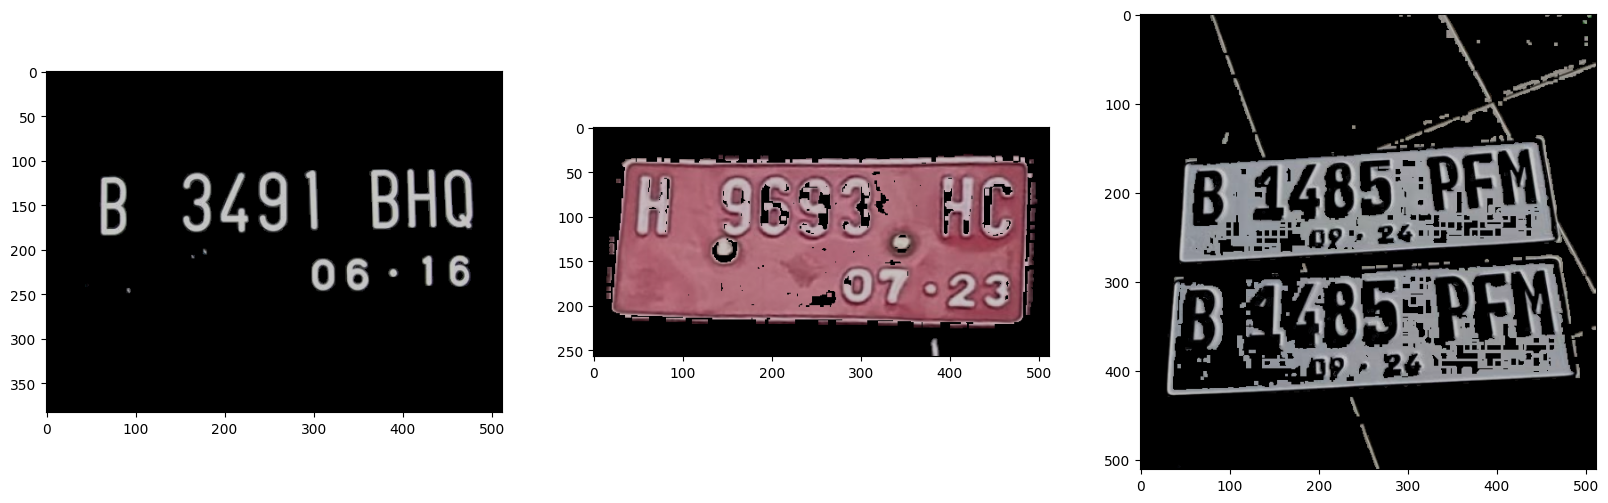

In [40]:
tampilFoto([masked[9],masked[176],masked[200]])

Fungsi `tampilFoto()` pada code di atas dengan argumen `[masked[0], masked[160], masked[299]]` akan menampilkan tiga gambar hasil masking dari array `masked`.

Berikut adalah penjelasan singkat tentang kode tersebut:

1. Fungsi `tampilFoto()` digunakan untuk menampilkan gambar-gambar yang diberikan sebagai argumen.

2. Anda memanggil fungsi `tampilFoto()` dengan argumen `[masked[0], masked[160], masked[299]]`.

3. Ini berarti Anda ingin menampilkan gambar hasil masking dari indeks ke-0, indeks ke-160, dan indeks ke-299 dalam array `masked`.

4. Di dalam fungsi `tampilFoto()`, dilakukan pengaturan plot untuk menampilkan beberapa gambar secara sejajar.

5. Pada setiap iterasi loop, gambar dalam array `masked` ditampilkan menggunakan `plt.imshow()`.

6. Parameter `cmap='gray'` digunakan untuk menampilkan gambar dalam skala abu-abu.

7. Setelah semua gambar ditampilkan, tampilan plot akhirnya ditampilkan menggunakan `plt.show()`.

Dengan menjalankan kode tersebut, Anda akan melihat tiga gambar hasil masking yang telah diproses dari array `masked`. Gambar-gambar tersebut akan ditampilkan secara sejajar dalam satu jendela tampilan.

In [42]:
def rgb(image):
    image = image.transpose()
    rs = image[0]
    gs = image[1]
    bs = image[2]

    rmean = np.mean(rs)
    gmean = np.mean(gs)
    bmean = np.mean(bs)

    rmax= np.amax(rs)
    gmax= np.amax(gs)
    bmax= np.amax(bs)

    return [rmean, gmean, bmean, rmax, gmax, bmax]


 `rgb(image)`: Fungsi ini menghitung beberapa statistik warna dari gambar. Gambar masukan diharapkan dalam format RGB. Fungsi ini menghitung rata-rata (mean) dan nilai maksimum (max) dari setiap saluran warna merah (R), hijau (G), dan biru (B). Statistik tersebut kemudian dikembalikan dalam bentuk array.

In [43]:
features = []
for image in segments:
    feature = rgb(image)
    features.append(feature)

Berdasarkan code di atas, terdapat loop `for` yang digunakan untuk mengiterasi melalui setiap gambar dalam array `segments`. Pada setiap iterasi, dilakukan ekstraksi fitur menggunakan fungsi `rgb()`, dan fitur-fitur tersebut ditambahkan ke dalam array `features`.

Berikut adalah penjelasan singkat mengenai kode tersebut:

1. Membuat array kosong `features` yang akan digunakan untuk menyimpan fitur-fitur hasil ekstraksi.

2. Menggunakan loop `for` untuk mengiterasi melalui setiap gambar dalam array `segments`.

3. Pada setiap iterasi, gambar tersebut disimpan dalam variabel `image`.

4. Memanggil fungsi `rgb()` dengan argumen `image` untuk mengekstraksi fitur-fitur dari gambar.

5. Hasil fitur-fitur ekstraksi disimpan dalam variabel `feature`.

6. Fitur-fitur tersebut kemudian ditambahkan ke dalam array `features` menggunakan metode `append()`.

7. Setelah selesai mengiterasi melalui semua gambar dalam array `segments`, array `features` akan berisi fitur-fitur hasil ekstraksi.

Dengan menggunakan kode tersebut, Anda dapat melakukan ekstraksi fitur menggunakan fungsi `rgb()` pada setiap gambar dalam array `segments` dan menyimpan fitur-fitur hasil ekstraksi dalam array `features`.

In [44]:
filenames = pd.DataFrame(filenames, columns=["filenames"])
labelsdf = pd.DataFrame(label, columns=["labels"])

Berdasarkan code di atas, terdapat dua operasi yang dilakukan pada data `filenames` dan `label`. Pertama, data `filenames` diubah menjadi objek DataFrame dengan nama kolom "filenames". Kedua, data `label` diubah menjadi objek DataFrame dengan nama kolom "labels".

Berikut adalah penjelasan singkat mengenai kode tersebut:

1. Mengimpor modul `pandas` dengan alias `pd` agar dapat menggunakan fitur-fitur dari pandas.

2. Membuat objek DataFrame `filenames` dengan menggunakan `pd.DataFrame()`. Data `filenames` digunakan sebagai argumen pertama, dan parameter `columns` digunakan untuk menentukan nama kolom menjadi "filenames".

3. Membuat objek DataFrame `labelsdf` dengan menggunakan `pd.DataFrame()`. Data `label` digunakan sebagai argumen pertama, dan parameter `columns` digunakan untuk menentukan nama kolom menjadi "labels".

4. Setelah menjalankan kode ini, Anda akan memiliki dua objek DataFrame, yaitu `filenames` dan `labelsdf`, yang berisi data `filenames` dan `label` dalam format DataFrame.

Dengan menggunakan kode tersebut, Anda dapat mengonversi data `filenames` dan `label` ke dalam objek DataFrame menggunakan pandas.

In [45]:
def export(data, namafile, column):
    glcm_df = pd.DataFrame(data, columns = column)
    glcm_df.to_csv(namafile)

Berdasarkan code di atas, terdapat sebuah fungsi bernama `export` yang digunakan untuk mengekspor data ke dalam file CSV menggunakan pandas.

Berikut adalah penjelasan singkat tentang kode tersebut:

1. Fungsi `export` memiliki tiga parameter: `data`, `namafile`, dan `column`.

2. Parameter `data` adalah data yang ingin diekspor ke dalam file CSV.

3. Parameter `namafile` adalah nama file CSV yang akan digunakan untuk menyimpan data.

4. Parameter `column` adalah daftar nama kolom yang akan digunakan dalam file CSV.

5. Di dalam fungsi, sebuah objek DataFrame baru dengan nama `glcm_df` dibuat menggunakan `pd.DataFrame()` dan menggunakan data `data` serta nama kolom dari parameter `column`.

6. Kemudian, objek DataFrame `glcm_df` diekspor ke dalam file CSV menggunakan metode `to_csv()` dengan argumen `namafile`. Ini akan menyimpan data ke dalam file CSV dengan nama yang telah ditentukan.

7. Dengan menjalankan fungsi `export` dengan argumen yang sesuai, Anda dapat mengekspor data ke dalam file CSV.

Catatan: Pastikan Anda telah mengimpor modul `pandas` dengan menggunakan `import pandas as pd` sebelum menjalankan fungsi `export`.

In [46]:
fitur = pd.DataFrame(features, columns=["hmean", "smean", "vmean", "hmax", "smax", "vmax"])
fitur.head()
columns=["hmean", "smean", "vmean", "hmax", "smax", "vmax"]
export(fitur, 'fitur.csv', columns)

Berdasarkan code di atas, terdapat dua operasi yang dilakukan pada data `features`. Pertama, data `features` diubah menjadi objek DataFrame dengan nama kolom yang telah ditentukan. Kedua, DataFrame `fitur` diekspor ke dalam file CSV menggunakan fungsi `export()`.

Berikut adalah penjelasan singkat mengenai kode tersebut:

1. Mengimpor modul `pandas` dengan alias `pd` agar dapat menggunakan fitur-fitur dari pandas.

2. Membuat objek DataFrame `fitur` dengan menggunakan `pd.DataFrame()`. Data `features` digunakan sebagai argumen pertama, dan parameter `columns` digunakan untuk menentukan nama kolom.

3. Memanggil metode `head()` pada objek DataFrame `fitur` untuk menampilkan beberapa baris pertama dari DataFrame tersebut.

4. Menentukan nama kolom dalam sebuah list `columns` yang sesuai dengan jumlah dan urutan fitur-fitur yang ada dalam data `features`.

5. Memanggil fungsi `export()` dengan argumen `fitur`, `'fitur.csv'`, dan `columns` untuk mengekspor DataFrame `fitur` ke dalam file CSV dengan nama "fitur.csv" dan menggunakan nama kolom yang telah ditentukan.

6. Dengan menjalankan kode ini, Anda akan memiliki file CSV yang berisi data fitur dengan nama kolom yang sesuai.

Dengan menggunakan kode tersebut, Anda dapat mengubah data fitur ke dalam objek DataFrame menggunakan pandas, menampilkan beberapa baris pertama dari DataFrame, dan mengekspor DataFrame ke dalam file CSV.

In [47]:
def exportCiri(filenames, fitur, label):
    glcm_df = pd.concat([filenames, fitur, label], axis=1)
    glcm_df.to_csv('ciri.csv')

Berdasarkan code di atas, terdapat sebuah fungsi bernama `exportCiri` yang digunakan untuk mengekspor data fitur, filenames, dan label ke dalam file CSV menggunakan pandas.

Berikut adalah penjelasan singkat tentang kode tersebut:

1. Fungsi `exportCiri` memiliki tiga parameter: `filenames`, `fitur`, dan `label`.

2. Parameter `filenames` adalah objek DataFrame yang berisi data filenames.

3. Parameter `fitur` adalah objek DataFrame yang berisi data fitur.

4. Parameter `label` adalah objek DataFrame yang berisi data label.

5. Di dalam fungsi, dilakukan penggabungan (concatenation) antara `filenames`, `fitur`, dan `label` menggunakan fungsi `pd.concat()`. Parameter `axis=1` digunakan untuk menggabungkan secara horizontal (berdasarkan kolom).

6. Hasil penggabungan tersebut disimpan dalam objek DataFrame `glcm_df`.

7. Objek DataFrame `glcm_df` kemudian diekspor ke dalam file CSV menggunakan metode `to_csv()` dengan argumen `'ciri.csv'`. Ini akan menyimpan data fitur, filenames, dan label ke dalam file CSV dengan nama "ciri.csv".

8. Dengan menjalankan fungsi `exportCiri` dengan argumen yang sesuai, Anda dapat mengekspor data fitur, filenames, dan label ke dalam file CSV.

Catatan: Pastikan Anda telah mengimpor modul `pandas` dengan menggunakan `import pandas as pd` sebelum menjalankan fungsi `exportCiri`.

In [48]:
ciri = pd.concat([filenames, fitur, labelsdf], axis=1)
ciri.head()
exportCiri(filenames, fitur, labelsdf)

Berdasarkan code di atas, terdapat beberapa operasi yang dilakukan pada data `filenames`, `fitur`, dan `labelsdf`. Pertama, dilakukan penggabungan (concatenation) antara ketiga objek DataFrame tersebut menjadi satu objek DataFrame yang disimpan dalam variabel `ciri`. Kedua, digunakan metode `head()` untuk menampilkan beberapa baris pertama dari objek DataFrame `ciri`. Ketiga, dilakukan pemanggilan fungsi `exportCiri()` untuk mengekspor objek DataFrame `ciri` ke dalam file CSV.

In [49]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Berdasarkan code di atas, dilakukan import beberapa library yang umumnya digunakan dalam tugas pembelajaran mesin dan evaluasi model. Berikut adalah penjelasan singkat tentang setiap baris kode tersebut:

1. `from warnings import simplefilter`: Baris ini mengimpor fungsi `simplefilter` dari modul `warnings`. Fungsi ini digunakan untuk mengatur perilaku peringatan (warnings) yang akan ditampilkan.

2. `simplefilter(action='ignore', category=FutureWarning)`: Baris ini mengatur agar peringatan dengan kategori "FutureWarning" diabaikan dan tidak ditampilkan. Ini dilakukan untuk menghindari tampilnya peringatan yang berkaitan dengan pembaruan atau perubahan di masa depan.

3. `from sklearn.metrics import confusion_matrix`: Baris ini mengimpor fungsi `confusion_matrix` dari modul `sklearn.metrics`. Fungsi ini digunakan untuk menghitung matriks kebingungan (confusion matrix) yang merupakan metode umum untuk mengevaluasi kinerja model klasifikasi.

4. `from sklearn.model_selection import train_test_split`: Baris ini mengimpor fungsi `train_test_split` dari modul `sklearn.model_selection`. Fungsi ini digunakan untuk membagi data menjadi subset pelatihan (training set) dan subset pengujian (testing set) yang digunakan dalam validasi model.

5. `from sklearn.metrics import classification_report`: Baris ini mengimpor fungsi `classification_report` dari modul `sklearn.metrics`. Fungsi ini digunakan untuk menghasilkan laporan klasifikasi yang menyediakan metrik evaluasi yang lebih rinci, seperti presisi (precision), recall, dan f1-score.

6. `import matplotlib.pyplot as plt`: Baris ini mengimpor modul `matplotlib.pyplot` dengan alias `plt`. Modul ini digunakan untuk membuat plot dan visualisasi data.

Dengan mengimpor modul-modul ini, Anda dapat menggunakan berbagai fungsi dan metode yang disediakan oleh modul tersebut untuk evaluasi model dan visualisasi data.

In [50]:
x = fitur.values
y = labelsdf.values.ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=21)

Berdasarkan code di atas, terdapat beberapa operasi yang dilakukan untuk membagi data menjadi subset pelatihan (training set) dan subset pengujian (testing set). Berikut adalah penjelasan singkat tentang kode tersebut:

1. `x = fitur.values`: Baris ini mengambil nilai-nilai (values) dari objek DataFrame `fitur` dan menyimpannya ke dalam variabel `x`. Nilai-nilai tersebut akan digunakan sebagai fitur (features) dalam pembelajaran mesin.

2. `y = labelsdf.values.ravel()`: Baris ini mengambil nilai-nilai (values) dari objek DataFrame `labelsdf` dan melakukan operasi `ravel()` untuk meratakan (flatten) array tersebut. Nilai-nilai tersebut akan digunakan sebagai target atau label dalam pembelajaran mesin.

3. `x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)`: Baris ini menggunakan fungsi `train_test_split` untuk membagi data menjadi subset pelatihan (training set) dan subset pengujian (testing set). Parameter `x` dan `y` adalah data yang akan dibagi. Parameter `test_size=0.2` menentukan proporsi pengujian setelah pembagian, dalam hal ini 20% akan menjadi subset pengujian. Parameter `random_state=21` digunakan untuk mengatur seed (nilai awal) untuk menghasilkan pembagian yang konsisten setiap kali kode dijalankan.

4. Setelah operasi ini selesai, Anda akan memiliki empat variabel: `x_train` (fitur pelatihan), `x_test` (fitur pengujian), `y_train` (label pelatihan), dan `y_test` (label pengujian). Variabel ini dapat digunakan untuk melatih model dan melakukan evaluasi pada subset pengujian.

Dengan menggunakan kode ini, Anda telah berhasil membagi data menjadi subset pelatihan dan pengujian yang akan digunakan dalam pembelajaran mesin dan evaluasi model.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Berdasarkan code di atas, terdapat import library `KNeighborsClassifier` dari `sklearn.neighbors` yang digunakan untuk mengimplementasikan algoritme K-Nearest Neighbors (K-NN) untuk klasifikasi. Selain itu, juga diimport library `accuracy_score` dari `sklearn.metrics` yang digunakan untuk menghitung akurasi model.

In [52]:
modelnb = KNeighborsClassifier(n_neighbors=5)

nbtrain = modelnb.fit(x_train, y_train)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Hitam       0.70      1.00      0.82        16
       Merah       0.95      0.95      0.95        20
       Putih       1.00      0.71      0.83        24

    accuracy                           0.87        60
   macro avg       0.88      0.89      0.87        60
weighted avg       0.90      0.87      0.87        60

0.8666666666666667


Berdasarkan code di atas terdapat beberapa operasi yang dilakukan untuk melatih model K-Nearest Neighbors (K-NN) dan melakukan evaluasi terhadap hasil prediksi model